In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

# DXT – Junior Algo Analyst Test

### In order to solve this exercise I decided to use python on Jupyter, using the library Pandas, which is the best to work with large datasets

First, I import the commodity_A.txt file on a pandas dataframe and I name the columns as specified in the problem: open, high, low, close, timestamp. 

Then, I put the timestamp as the index of the dataframe

In [2]:
df_A = pd.read_csv('commodity_A.txt',delim_whitespace=True, header = None) #Import the file on a pandas dataframe
df_A.columns = ['Open_A', 'High_A','Low_A','Close_A','Timestamp'] #Rename the columns
df_A = df_A.set_index('Timestamp').copy() # I set the timestamp as the index
df_A

,Open_A,High_A,Low_A,Close_A
Timestamp,,,,
737062.0000,NaN,NaN,NaN,NaN
737062.0400,NaN,NaN,NaN,NaN
737062.0800,NaN,NaN,NaN,NaN
737062.1300,NaN,NaN,NaN,NaN
737062.1700,NaN,NaN,NaN,NaN
...,...,...,...,...
738519.5400,18.9900,18.9900,18.8400,18.8500
738519.5800,18.8400,18.9700,18.8300,18.9400
738519.6300,18.9500,19.1500,18.9300,19.1100


We can see that we have 34986 rows and a lot of nans 

#### Now, I plot the absolute close price of the commodity

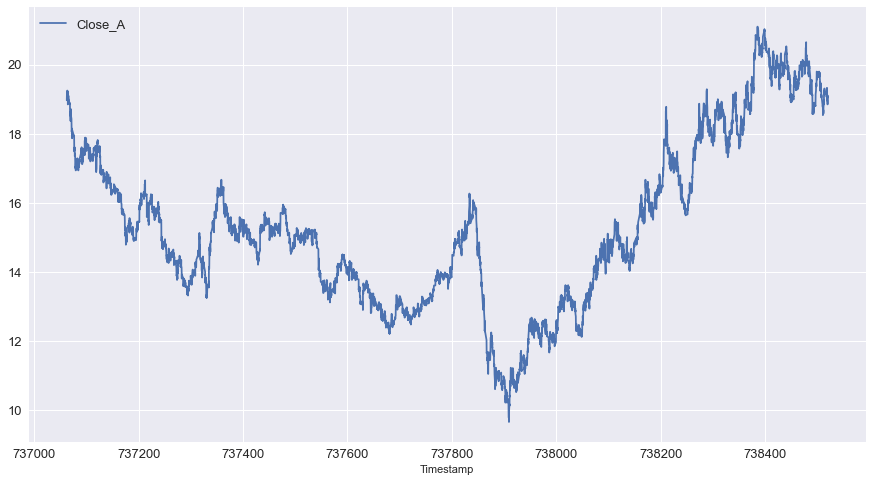

In [3]:
df_A.Close_A.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

#### Typically, in financial analysis it is more convenient to plot the relative change of the commodity
Now, I plot the Close price, divided by the first close price which is not a NAN


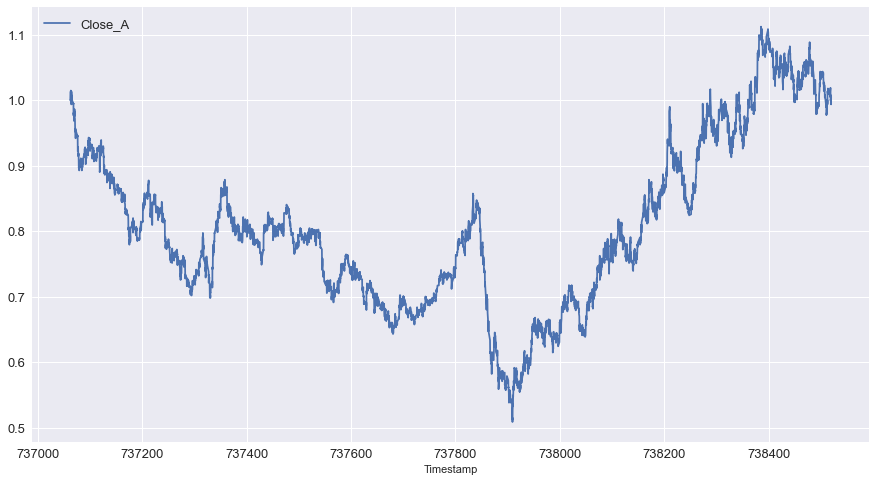

In [4]:
df_A.Close_A.div(df_A.Close_A.loc[df_A.Close_A.first_valid_index()]).dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## 2 - Apply a linear moving average
### Now, I apply a linear moving average, in order to smooth the graph, and plot it over the original

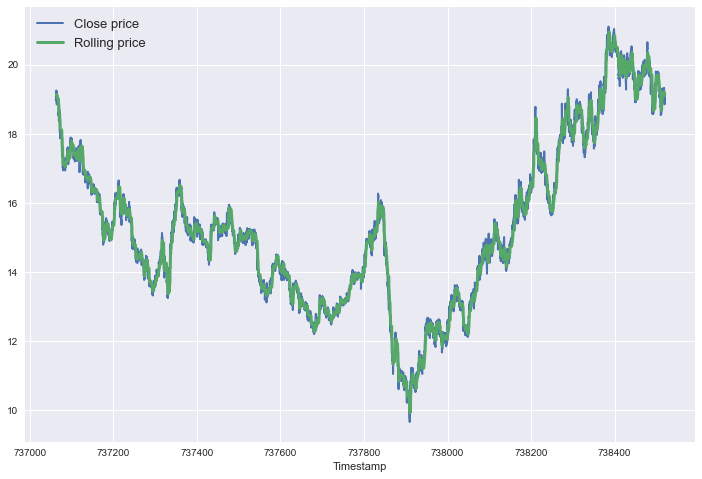

In [5]:
df_A_withoutnans =  df_A.dropna()
roll_close = df_A_withoutnans.Close_A.rolling(window = 20).mean()

df_A.Close_A.dropna().plot(label = "Close price",linewidth = 2)
roll_close.plot(figsize = (12, 8),label = "Rolling price",linewidth = 3)
plt.legend(fontsize = 13)
plt.show()

# Second part of the exercise 
### Now, I have to import the commodity_b file and align with commodity_a. It will be an easy task because we set timestamp as index of the pandas dataframe

I begin with importing the commodity_b file and saving on a pandas dataframe

In [6]:
df_B = pd.read_csv('commodity_B.txt',delim_whitespace=True, header = None)
df_B.columns = ['Open_B', 'High_B','Low_B','Close_B','Timestamp']
df_B = df_B.set_index('Timestamp').copy()
df_B

,Open_B,High_B,Low_B,Close_B
Timestamp,,,,
737063.3300,420.4000,422.8000,420.2000,420.9000
737063.3800,420.9000,421.3000,420.4000,420.7000
737063.4200,420.7000,420.8000,420.0000,420.1000
737063.4600,420.1000,420.6000,420.0000,420.4000
737063.5000,420.4000,420.4000,418.5000,419.7000
...,...,...,...,...
738520.5400,498.2000,501.5000,495.4000,496.1000
738520.5800,495.9000,497.0000,495.4000,496.5000
738520.6300,496.5000,496.5000,491.6000,492.1000


### I concatenate the two pandas dataframe
Now, they are aligned based on the Timestamp value

In [7]:
merged = pd.concat([df_A, df_B], axis=1, join="outer")
merged

,Open_A,High_A,Low_A,Close_A,Open_B,High_B,Low_B,Close_B
Timestamp,,,,,,,,
737062.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737062.0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737062.0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737062.1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737062.1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
738520.5400,NaN,NaN,NaN,NaN,498.2000,501.5000,495.4000,496.1000
738520.5800,NaN,NaN,NaN,NaN,495.9000,497.0000,495.4000,496.5000
738520.6300,NaN,NaN,NaN,NaN,496.5000,496.5000,491.6000,492.1000


# I now compute the 5 period returns
## There are several ways of doing it. I can take the logarithms of the division, or simply divide the close price and subtract one. I decide to do the last one

From a numerical point of view, I will use the shift(5) method. I simply take the close price and I shift it down by 5. Then, I perform the division with the .div method

In [8]:
merged["Return_A"] = merged.Close_A.div(merged.Close_A.shift(5)) - 1
merged["Return_B"] = merged.Close_B.div(merged.Close_B.shift(5)) - 1

merged

,Open_A,High_A,Low_A,Close_A,Open_B,High_B,Low_B,Close_B,Return_A,Return_B
Timestamp,,,,,,,,,,
737062.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737062.0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737062.0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737062.1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737062.1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
738520.5400,NaN,NaN,NaN,NaN,498.2000,501.5000,495.4000,496.1000,NaN,-0.0048
738520.5800,NaN,NaN,NaN,NaN,495.9000,497.0000,495.4000,496.5000,NaN,-0.0028
738520.6300,NaN,NaN,NaN,NaN,496.5000,496.5000,491.6000,492.1000,NaN,-0.0116


## By using the .describe method I get statistical information about return_a and return_b

In [9]:
merged.loc[:,["Return_A","Return_B"]].describe()

,Return_A,Return_B
count,4894.0000,4940.0000
mean,-0.0004,-0.0004
std,0.0107,0.0093
min,-0.0397,-0.0447
25%,-0.0070,-0.0059
50%,-0.0007,-0.0005
75%,0.0058,0.0050
max,0.0519,0.0495


# The mean and std are particular important. 
### The mean of the return is a way to estimate the reward of the investment, the larger is the mean the higher is the reward that you can get on the investment. 
### The std, on the other hand gives information on the volatility of the commodity, the larger it is, the larger is the risk. 

We can see that Commodity_A has a larger STD compared to the Commodity_B.

Commodity_A has a std of 0.0107, while Commodity_B has a std of 0.0093 

#### Takehome message, commodity_A is more volatile








# Correlation

### Let's now compute the correlation between the two commodities.  

Can be computed with the .corr method of pandas

In [10]:
merged.loc[:,["Return_A","Return_B"]].corr()

,Return_A,Return_B
Return_A,1.0000,0.8375
Return_B,0.8375,1.0000


We can see that there is a correlation of 0.8375 between the return of the commodity A and commodity B. The two commodities present clearly a strong correlation

# Although is not requested in the exercise let's perform some further analysis

### First, I plot the two commodities close price dividing it by the first close price

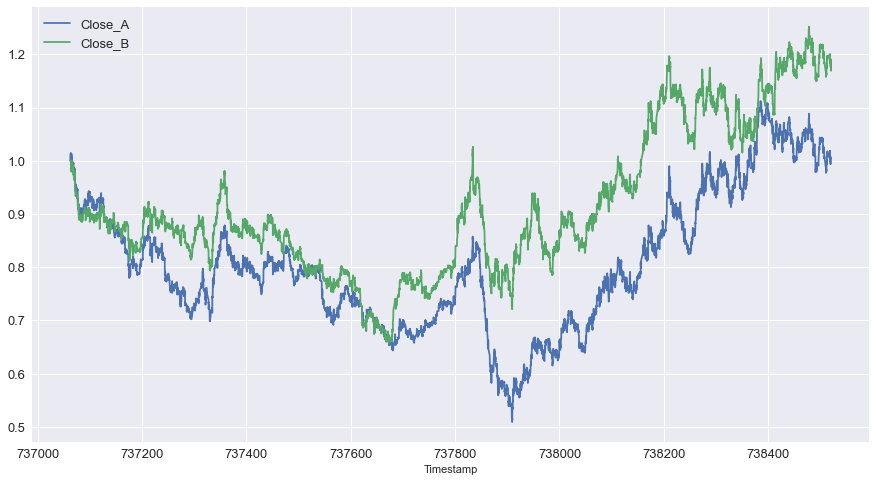

In [11]:
df_A.Close_A.div(df_A.Close_A.loc[df_A.Close_A.first_valid_index()]).dropna().plot(figsize = (15, 8), fontsize = 13)
df_B.Close_B.div(df_B.Close_B.loc[df_B.Close_B.first_valid_index()]).dropna().plot(figsize = (15, 8), fontsize = 13)

plt.legend(fontsize = 13)
plt.show()

Looking at this plot the correlation between the two commodities is clear



## Now, I would like to see whether the distribution of the returns follow a normal distribution

I compute the log return, by taking the logarithm of the close price and the close price shifted by 5

In [12]:
merged["Log_Return_A"] = np.log(merged.Close_A.div(merged.Close_A.shift(5)))
merged["Log_Return_B"] = np.log(merged.Close_B.div(merged.Close_B.shift(5)))

### Now, I plot the return dividing in histograms and I plot the normal curve, let's see the comparison

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


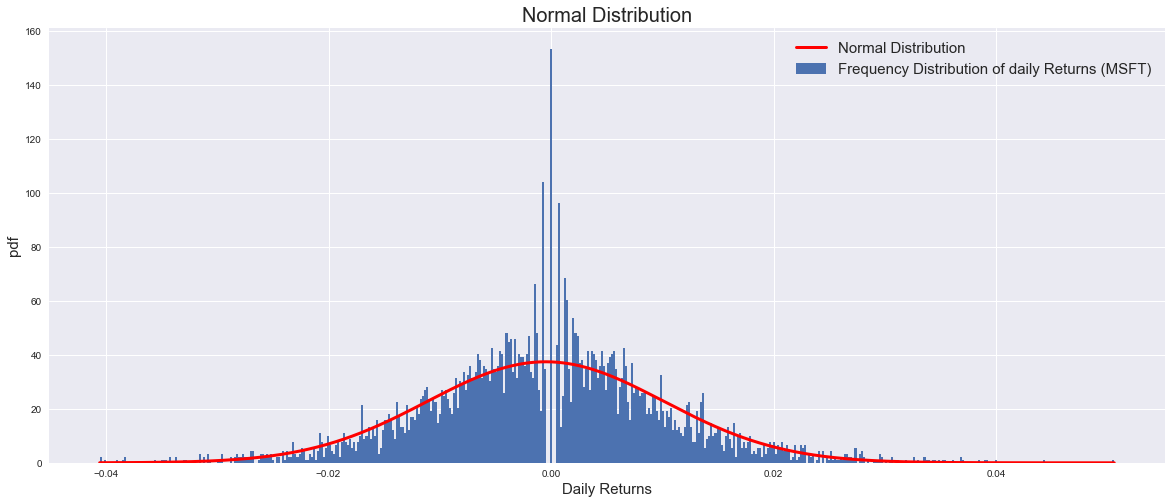

In [13]:
mu = merged.Log_Return_A.mean()
sigma = merged.Log_Return_A.std()

x = np.linspace(merged.Log_Return_A.min(), merged.Log_Return_A.max(), 10000)
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values a for normal distribution with mu, sigma
plt.figure(figsize = (20, 8))
plt.hist(merged.Log_Return_A, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


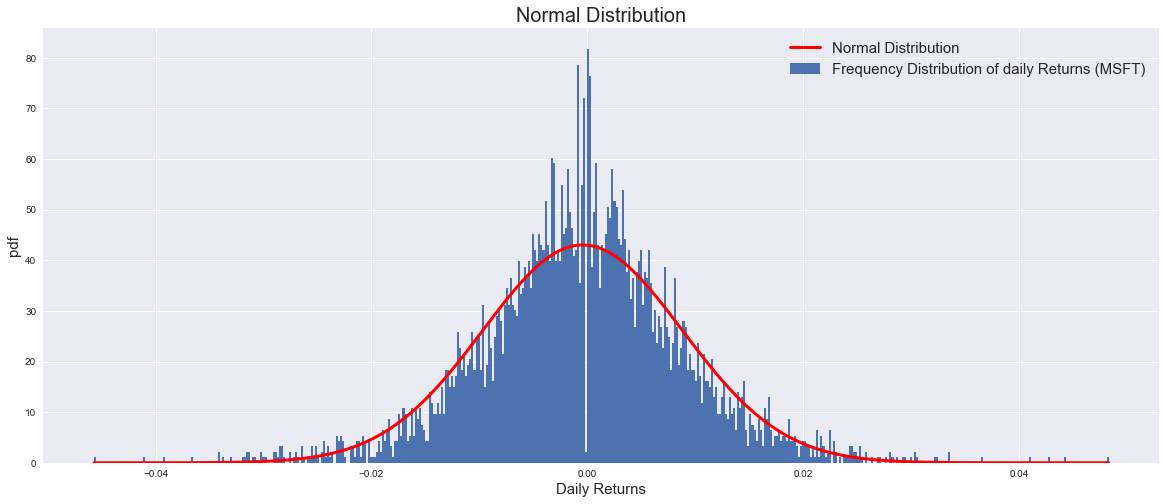

In [14]:
mu = merged.Log_Return_B.mean()
sigma = merged.Log_Return_B.std()

x = np.linspace(merged.Log_Return_B.min(), merged.Log_Return_B.max(), 10000)
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values a for normal distribution with mu, sigma
plt.figure(figsize = (20, 8))
plt.hist(merged.Log_Return_B, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### In both plots it is evident that the distribution of the return seems to follow a normal distribution, but they present a larger event in the tails, extreme events which increase the risk (fat tails) 


This can be confirmed with the Kurtosis-fisher index, which is 0 for a normal distribution, is larger than 0 for fat-tails distributions

In [15]:
stats.kurtosis(merged.Log_Return_A.dropna(), fisher = True)

0.8738548326284219

In [16]:
stats.kurtosis(merged.Log_Return_B.dropna(), fisher = True)

1.3160330653760672

## Looking at the plot of the two commodities it is evident that the commodity b is a better stock over the analyzed period, it has a better return and a lower std.

To conclude, it has a better risk/reward ratio